<a href="https://colab.research.google.com/github/SergioaA64/SergioaA64/blob/main/07-D6_Trab_Final_MariaJulia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESCOLA NACIONAL DE ADMINISTRAÇÃO PÚBLICA - ENAP**

ESPECIALIZAÇÃO EM CIÊNCIA DE DADOS APLICADA A POLÍTICAS PÚBLICAS

D6 – ESTATÍSTICA DESCRITIVA - TRABALHO FINAL

PROFESSOR: EDUARDO MONTEIRO DE CASTRO GOMES

ALUNA: MARIA JÚLIA CASTRO WEGELIN

SET/2021

**CONTEXTUALIZAÇÃO DO PROBLEMA**

O trabalho buscou fazer uma análise dos indicadores de acesso a água e esgotamento sanitário da população dos municípios brasileiros. Foram analisados também algumas informações como: vomume de água consumido per capita, valor dos investimentos do Estado em infraestrutura de acesso à agua e esgotamento sanitário, quantidade e duração das paralizações de fornecimento de água nos municípios e quantidade de reclamações relacionadas às paralizações de fornecimento de água. Foram adicionados dados também do IDH dos municípios para se analisar a correlação entre o acesso a àgua e esgotamento sanitário e o IDG dos municípios.

**Fonte de dados:**

Acesso a água e esgotamento sanitário: SNIS http://app4.mdr.gov.br/serieHistorica/# (tabela de informações e indicadores municipais consolidados).

IDH: Dados extraídos do IBGE pela equipe que gerencia o CGUDATA.

**IMPORTAÇÃO E LIMPEZA DOS DADOS**

In [ ]:
# Importação das bibliotecas e dos dados referentes ao acesso a água e esgotamento sanitário.

import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
  
agua = pd.read_csv("https://raw.githubusercontent.com/mariajuliawegelin/D6/main/Informa%C3%A7%C3%B5eseindicadoresmunicipaisconsolidados_v2.csv", encoding = "iso8859_16", sep =";")
agua.fillna(0)
agua['PopTotalEsgotamento'] = agua['PopTotalEsgotamento'].replace(np.nan, 0)
agua['PopTotalAgua'] = agua['PopTotalAgua'].replace(np.nan, 0)
agua.head()


,CódigoIBGE,CódigoMunicípio,Município,Estado,Regiao,Ano,PopTotalAgua,PopTotalEsgotamento,VolumeAguaProduzido,VolumeAguaConsumido,ConsumoAguaPercapita,ConsumoEnergiaEletrica,ConsumoEnergiaPercapita,InvestimentoTotalEstado,InvestimentoPercapita,QuantidadeParalizacoes,DuracaoParalizacoes,QuantidadeReclamacoes
0,1200013,120001,Acrelândia,AC,N,2019,15256.0,0.0,939.81,253.87,0.02,424.40,0.03,175307.55,11.49,0.0,0.0,568.0
1,1200054,120005,Assis Brasil,AC,N,2019,7417.0,0.0,662.28,330.32,0.04,376.04,0.05,84980.97,11.46,12.0,225.0,515.0
2,1200104,120010,Brasiléia,AC,N,2019,26278.0,0.0,2712.12,826.20,0.03,892.49,0.03,297693.89,11.33,15.0,210.0,1059.0
3,1200138,120013,Bujari,AC,N,2019,10266.0,0.0,511.80,260.49,0.03,570.59,0.06,0.00,0.00,5.0,76.0,177.0
4,1200179,120017,Capixaba,AC,N,2019,11733.0,0.0,600.49,244.71,0.02,218.14,0.02,0.00,0.00,276.0,2608.0,235.0


In [ ]:
# Importar dados do ihd dos municípios:
idh = pd.read_csv("https://raw.githubusercontent.com/mariajuliawegelin/D6/main/entes_ibge_siafi_tse_idhm.csv", encoding = "iso8859_16", sep =";" , decimal=",")
idh = idh.rename(columns={'COD_IBGE': 'CódigoIBGE'})
idh.head()

,CódigoIBGE,COD_SIAFI,NOME_ENTE,NOME_SIMPLIFICADO,SIGLA_UF,NOME_UF,LAT,LNG,POP_EST_2020,CAPITAL,NOME_ANTIGO_OU_GRAFIA_DIFERENTE,ALT,REGIAO,COD_UE_TSE_2016,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE
0,1200000,NaN,Estado do Acre,ESTADO DO ACRE,AC,Acre,NaN,NaN,894470,NaN,NaN,NaN,N,NaN,0.663,0.671,0.777,0.559
1,2700000,NaN,Estado de Alagoas,ESTADO DE ALAGOAS,AL,Alagoas,NaN,NaN,3351543,NaN,NaN,NaN,NE,NaN,0.631,0.641,0.755,0.520
2,1300000,NaN,Estado do Amazonas,ESTADO DO AMAZONAS,AM,Amazonas,NaN,NaN,4207714,NaN,NaN,NaN,N,NaN,0.674,0.677,0.805,0.561
3,1600000,NaN,Estado do Amapá,ESTADO DO AMAPA,AP,Amapá,NaN,NaN,861773,NaN,NaN,NaN,N,NaN,0.708,0.694,0.813,0.629
4,2900000,NaN,Estado da Bahia,ESTADO DA BAHIA,BA,Bahia,NaN,NaN,14930634,NaN,NaN,NaN,NE,NaN,0.660,0.663,0.783,0.555


In [ ]:
# Mesclar tabelas, criar novas colunas que serão importantes para a análise e excluir algumas colunas que não serão necessárias:

dados = pd.merge(agua, idh, on=['CódigoIBGE'], how="inner")
dados['PercPopAgua'] = dados['PopTotalAgua']/ dados['POP_EST_2020']
dados['PercPopEsgotamento'] = dados['PopTotalEsgotamento']/ dados['POP_EST_2020']
dados.drop(['COD_SIAFI', 'NOME_ENTE', 'NOME_SIMPLIFICADO', 'SIGLA_UF', 'NOME_UF', 'LAT',	'LNG', 'CAPITAL',	'NOME_ANTIGO_OU_GRAFIA_DIFERENTE',	'ALT',	'REGIAO',	'COD_UE_TSE_2016'] , inplace=True, axis=1)
dados.head()


,CódigoIBGE,CódigoMunicípio,Município,Estado,Regiao,Ano,PopTotalAgua,PopTotalEsgotamento,VolumeAguaProduzido,VolumeAguaConsumido,ConsumoAguaPercapita,ConsumoEnergiaEletrica,ConsumoEnergiaPercapita,InvestimentoTotalEstado,InvestimentoPercapita,QuantidadeParalizacoes,DuracaoParalizacoes,QuantidadeReclamacoes,POP_EST_2020,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE,PercPopAgua,PercPopEsgotamento
0,1200013,120001,Acrelândia,AC,N,2019,15256.0,0.0,939.81,253.87,0.02,424.40,0.03,175307.55,11.49,0.0,0.0,568.0,15490,0.604,0.808,0.466,0.584,0.984893,0.0
1,1200054,120005,Assis Brasil,AC,N,2019,7417.0,0.0,662.28,330.32,0.04,376.04,0.05,84980.97,11.46,12.0,225.0,515.0,7534,0.588,0.770,0.456,0.578,0.984470,0.0
2,1200104,120010,Brasiléia,AC,N,2019,26278.0,0.0,2712.12,826.20,0.03,892.49,0.03,297693.89,11.33,15.0,210.0,1059.0,26702,0.614,0.770,0.485,0.619,0.984121,0.0
3,1200138,120013,Bujari,AC,N,2019,10266.0,0.0,511.80,260.49,0.03,570.59,0.06,0.00,0.00,5.0,76.0,177.0,10420,0.589,0.772,0.439,0.603,0.985221,0.0
4,1200179,120017,Capixaba,AC,N,2019,11733.0,0.0,600.49,244.71,0.02,218.14,0.02,0.00,0.00,276.0,2608.0,235.0,12008,0.575,0.794,0.398,0.601,0.977099,0.0


**INFORMAÇÕES GERAIS SOBRE OS DADOS**

A base de dados contém informações de 2019 dos 5.570 municípios brasileiros. Temos 25 variáveis, com as seguintes características:

* **5 variáveis qualitativas nominais**: 'CodigoIBGE'; ‘CodigoMunicípio’; 'Município'; 'Estado'; 'Regiao'.
* **7 variáveis quantitativas discretas**: 'Ano'; 'PopTotalEsgotamento'; 'PopTotal'; 'QuantidadeParalizacoes'; 'DuracaoParalizacoes'; 'QuantidadeReclamacoes'; 'POP_EST_2020'.
* **13 variáveis quantitativas contínuas**: 'PercPopAgua'; 'PercPopEsgotamento'; 'VolumeAguaProduzido'; 'VolumeAguaConsumido'; 'ConsumoAguaPercapita'; 'ConsumoEnergiaEletrica'; 'ConsumoEnergiaPercapita'; 'InvestimetoTotalEstado'; 'InvestimentoPercapita'; 'IDHM';	'IDHM_RENDA';	'IDHM_EDUCACAO';	'IDHM_LONGEVIDADE'.	

Obs: Cada linha corresponde a um município.

Obs2: Os dados de esgotamento sanitário são de 2019, enquanto que os dados do total estimado da população e IDH são de 2020, o que pode distorcer algumas conclusões.  


In [ ]:
# Descrição geral dos principais dados quantitativos relacionados ao acesso a água e esgotamento sanitário:

dados[['PercPopAgua',	'PercPopEsgotamento',	'ConsumoAguaPercapita','ConsumoEnergiaPercapita',	'InvestimentoTotalEstado',	'InvestimentoPercapita',	'QuantidadeParalizacoes',	'DuracaoParalizacoes',	'QuantidadeReclamacoes']].describe().round(2)

,PercPopAgua,PercPopEsgotamento,ConsumoAguaPercapita,ConsumoEnergiaPercapita,InvestimentoTotalEstado,InvestimentoPercapita,QuantidadeParalizacoes,DuracaoParalizacoes,QuantidadeReclamacoes
count,5570.00,5570.00,5570.00,5570.00,4017.00,5570.00,5176.00,5176.00,5176.00
mean,0.93,0.46,0.04,0.04,130150.82,2.15,12.21,171.79,10021.33
std,0.26,0.50,0.09,0.10,2144274.51,30.26,60.20,893.01,57147.66
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.99,0.00,0.02,0.01,0.00,0.00,0.00,0.00,349.00
50%,1.00,0.00,0.03,0.03,0.00,0.00,0.00,0.00,1530.00
75%,1.00,0.99,0.05,0.05,0.00,0.00,7.00,76.00,5261.75
max,1.18,1.18,5.59,4.20,91386958.80,1189.44,2153.00,23621.00,2215496.00


**Algumas informações iniciais sobre os dados:**

- Média do percentual da população dos municípios que tem acesso a água: 93%

- Média do percentual da população dos municípios que tem acesso a esgotamento sanitário: 46%

- Investimento médio do Estado em 2019 per capita de R$ 2,15

- O município que recebeu mais investimentos em 2019 recebeu R$ 91.386.958,80

- A quantidade média de paralizações no ano é de 12,21

- A duração média das paralizações foi de 171,79 minutos

- A quantidade média de reclamações por município foi de 9.312, um município registrou 2.215.496 reclamações em 2019


**ANÁLISES UTILIZANDO TABELAS E GRÁFICOS**

**1) MUNICÍPIO COM MAIOR NÚMERO DE RECLAMAÇÕES RELACIONADAS AO ABASTECIMENTO DE ÁGUA E ESGOTAMENTO SANITÁRIO**

In [ ]:
# Qual o município em que houve o maior número de reclamações relacionadas ao abastecimento de água e esgoto?

dados[dados['QuantidadeReclamacoes']==dados['QuantidadeReclamacoes'].max()]


,CódigoIBGE,CódigoMunicípio,Município,Estado,Regiao,Ano,PopTotalAgua,PopTotalEsgotamento,VolumeAguaProduzido,VolumeAguaConsumido,ConsumoAguaPercapita,ConsumoEnergiaEletrica,ConsumoEnergiaPercapita,InvestimentoTotalEstado,InvestimentoPercapita,QuantidadeParalizacoes,DuracaoParalizacoes,QuantidadeReclamacoes,POP_EST_2020,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE,PercPopAgua,PercPopEsgotamento
537,2927408,292740,Salvador,BA,NE,2019,2872347.0,2872347.0,289068.85,121417.93,0.04,113426.65,0.04,NaN,0.0,971.0,10354.0,2215496.0,2886698,0.759,0.835,0.679,0.772,0.995029,0.995029


A princípio, esperava-se que o maior registro de reclamações estivesse em municípios mais populosos, como São Paulo ou Rio de Janeiro. Porém a maior quantidade de reclamações em 2019 foi no município de Salvador/BA.

**2) ACESSO A ÁGUA E ESGOTAMENTO SANITÁRIO**

In [ ]:
# Média do percentual da população dos municípios que tem acesso a água por Região:
dados.groupby(["Regiao"])["PercPopAgua"].mean()

Regiao
CO    0.898218
N     0.782244
NE    0.909435
S     0.972700
SE    0.957980
Name: PercPopAgua, dtype: float64

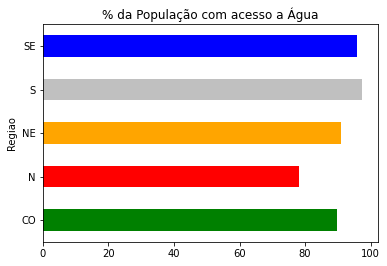

In [ ]:
agua = dados.groupby("Regiao").agg([np.mean, np.std])
agua = agua['PercPopAgua']*100
agua.plot(kind = "barh", y = "mean", legend = False, title = "% da População com acesso a Água", color=['green','red','orange','silver','blue'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


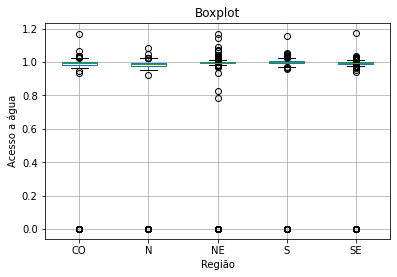

In [ ]:
fig, ax = plt.subplots()
dados.boxplot(column="PercPopAgua", by="Regiao", ax=ax)
ax.set_xlabel("Região")
ax.set_ylabel("Acesso a água")
ax.set_title("Boxplot")
plt.suptitle("")
plt.show()

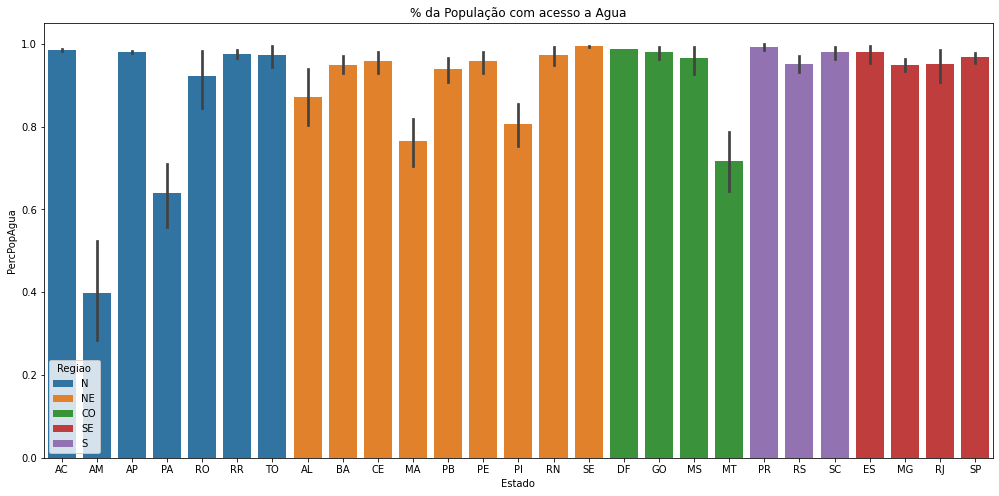

In [ ]:
agua = dados.groupby("Estado")['PercPopAgua'].agg([np.mean, np.std]).reset_index()
plt.figure(figsize=(17,8))
sns.barplot(x="Estado", y="PercPopAgua", hue='Regiao', data=dados, dodge=False, order=['AC','AM','AP','PA','RO','RR', 'TO','AL','BA','CE','MA','PB','PE','PI','RN','SE','DF','GO','MS','MT','PR','RS','SC','ES','MG','RJ','SP' ])
plt.title("% da População com acesso a Agua")
plt.show()

In [ ]:
# Média do percentual da população dos municípios que tem acesso a esgotamento sanitário por Região:

dados.groupby(["Regiao"])["PercPopEsgotamento"].mean()

Regiao
CO    38.543897
N     12.888889
NE    29.598662
S     34.844668
SE    84.412470
Name: PercPopEsgotamento, dtype: float64

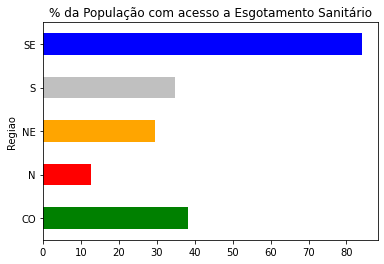

In [ ]:
esgotamento = dados.groupby("Regiao").agg([np.mean, np.std])
esgotamento = esgotamento['PercPopEsgotamento']*100
esgotamento.plot(kind = "barh", y = "mean", legend = False, title = "% da População com acesso a Esgotamento Sanitário", color=['green','red','orange','silver','blue'])

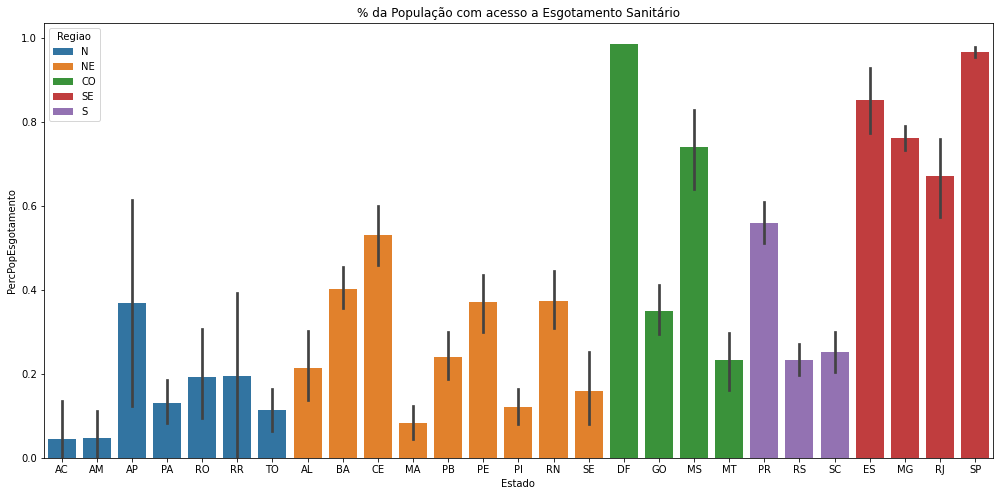

In [ ]:
esgotamento = dados.groupby("Estado")['PercPopEsgotamento'].agg([np.mean, np.std]).reset_index()
plt.figure(figsize=(17,8))
sns.barplot(x="Estado", y="PercPopEsgotamento", hue='Regiao', data=dados, dodge=False, order=['AC','AM','AP','PA','RO','RR', 'TO','AL','BA','CE','MA','PB','PE','PI','RN','SE','DF','GO','MS','MT','PR','RS','SC','ES','MG','RJ','SP' ])
plt.title("% da População com acesso a Esgotamento Sanitário")
plt.show()

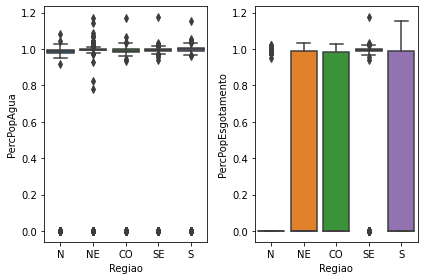

In [ ]:
fig, ax = plt.subplots(1,2)
sns.boxplot(ax = ax[0], x= 'Regiao', y = 'PercPopAgua', data=dados, whis=2, width=0.8, dodge=False)
sns.boxplot(ax = ax[1], x= 'Regiao', y = 'PercPopEsgotamento', data=dados, whis=2, width=0.8, dodge=False)

fig.tight_layout()
plt.show()


**•	Interpretação dos resultados obtidos - Acesso a água e esgotamento sanitário**

A região Norte é a que possui a população com menor acesso a água e esgotamento sanitário. A região Sudeste é a que possui maior acesso a água e esgotamento sanitário.
Na maior parte dos municípios de todas as regiões, toda a população possui acesso a água. Mas ainda assim, em todas as Regiões há pelo menos um município cuja população não tem acesso a água.
Os estados de SP e o DF são as unidades da federação com maior percentual de acesso a esgotamento sanitário, com baixo desvio padrão.
O ES, RJ e MS, apesar de terem uma média alta de acesso a esgotamento sanitário, possuem um desvio padrão alto, com alguns municípios com acesso muito superior e outros muito inferior à média.
O AP, apesar de ser o estado com maior média de acesso a esgotamento sanitário da região Norte, é o que possui maior desvio padrão.





**3) CONSUMO DE ÁGUA**

In [ ]:
# Análise dos dados sobre consumo de água per capita por região

dados.groupby(["Regiao"])["ConsumoAguaPercapita"].mean()

Regiao
CO    0.040278
N     0.021600
NE    0.025385
S     0.041830
SE    0.050809
Name: ConsumoAguaPercapita, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


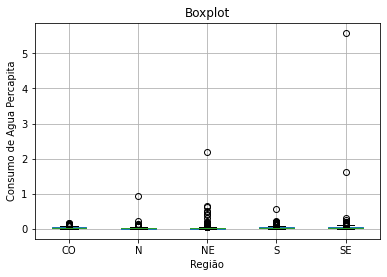

In [ ]:
# Plota o Boxplot do consumo de água per capita por região

fig, ax = plt.subplots()
dados.boxplot(column="ConsumoAguaPercapita", by="Regiao", ax=ax)
ax.set_xlabel("Região")
ax.set_ylabel("Consumo de Agua Percapita")
ax.set_title("Boxplot")
plt.suptitle("")
plt.show()


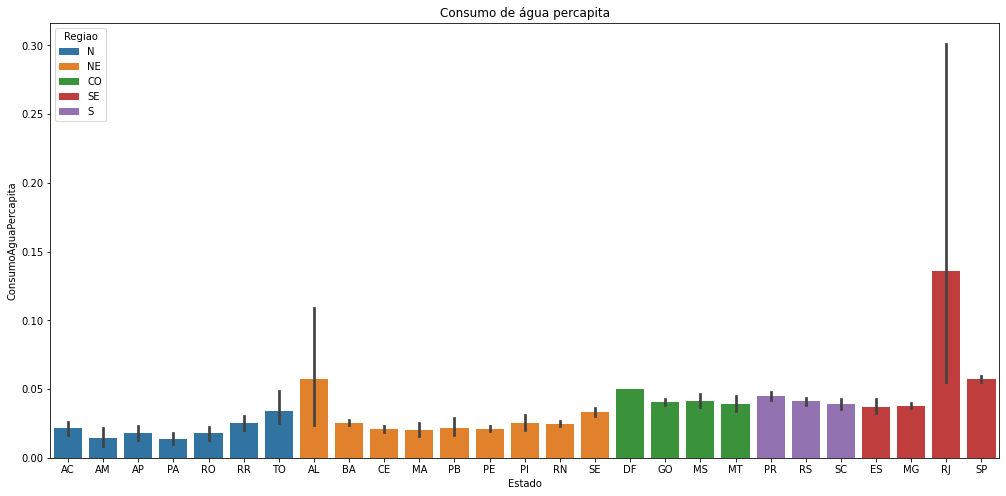

In [ ]:
consumo = dados.groupby("Estado")['ConsumoAguaPercapita'].agg([np.mean, np.std]).reset_index()
plt.figure(figsize=(17,8))
sns.barplot(x="Estado", y="ConsumoAguaPercapita", hue='Regiao', data=dados, dodge=False, order=['AC','AM','AP','PA','RO','RR', 'TO','AL','BA','CE','MA','PB','PE','PI','RN','SE','DF','GO','MS','MT','PR','RS','SC','ES','MG','RJ','SP' ])
plt.title("Consumo de água percapita")
plt.show()

**•	Interpretação dos resultados obtidos - Consumo de água percapita**

O consumo de água percapita médio é maior na região Sudeste, sendo mais que o dobro do que o identificado na Região Norte, onde há o menor consumo percapita.
Foram identificadas também algumas cidades onde o consumo é muito maior que a média da Região, onde podem ser analisadas as causas e avaliadas, se for o caso, medidas de redução de consumo.

**4) VOLUME DE ÁGUA PRODUZIDO E CONSUMIDO**

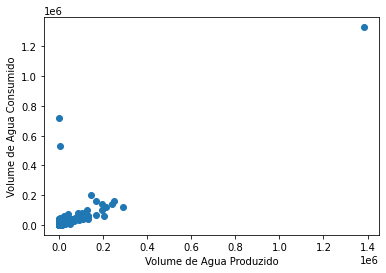

In [ ]:
# Diagrama de dispersão: verificar se há relação entre o volume de água produzido no município e o volume de água consumido no município

fig, ax = plt.subplots()
ax.scatter(dados["VolumeAguaProduzido"],dados["VolumeAguaConsumido"])
ax.set_xlabel("Volume de Agua Produzido")
ax.set_ylabel("Volume de Agua Consumido")
plt.show()


**•	Interpretação dos resultados obtidos - relação entre volume de água produzido e consumido**

Apesar de haver algumas variáveis que destoam, com alguns municípios consumindo um volume muito maior do que produzem, observa-se um padrão linear entre as variáveis.

**5) RELAÇÃO ENTRE INVESTIMENTO E QUANTIDADE DE PARALIZAÇÕES**

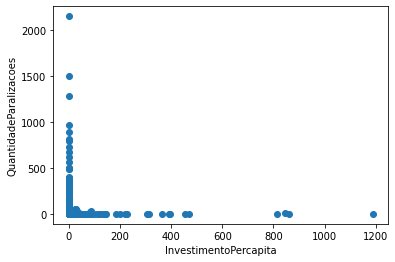

In [ ]:
# Diagrama de dispersão: verificar se há relação entre o investimento per capita do Estado no município e a quantidade de paralizações de abastecimento no município

fig, ax = plt.subplots()
ax.scatter(dados["InvestimentoPercapita"],dados["QuantidadeParalizacoes"])
ax.set_xlabel("InvestimentoPercapita")
ax.set_ylabel("QuantidadeParalizacoes")
plt.show()


**•	Interpretação dos resultados obtidos - relação entre investimento per capita do Estado no município e a quantidade de paralizações**

Não foi identificada relação entre o investimento per capita do Estado no município e a quantidade de paralizações de abastecimento no município.

**6) VALOR DE INVESTIMENTO DO ESTADO POR REGIÃO**

In [ ]:
# Verificar quanto cada região recebeu em média de investimento per capita

dados.groupby(["Regiao"])["InvestimentoPercapita"].mean()

Regiao
CO    3.872591
N     5.039133
NE    3.841628
S     0.007641
SE    0.611493
Name: InvestimentoPercapita, dtype: float64

In [ ]:
# Verificar quanto cada região de investimentos totais do Estado

dados.groupby(["Regiao"])["InvestimentoTotalEstado"].sum()

Regiao
CO    3.527792e+07
N     1.853859e+08
NE    2.803944e+08
S     5.224975e+04
SE    2.170540e+07
Name: InvestimentoTotalEstado, dtype: float64

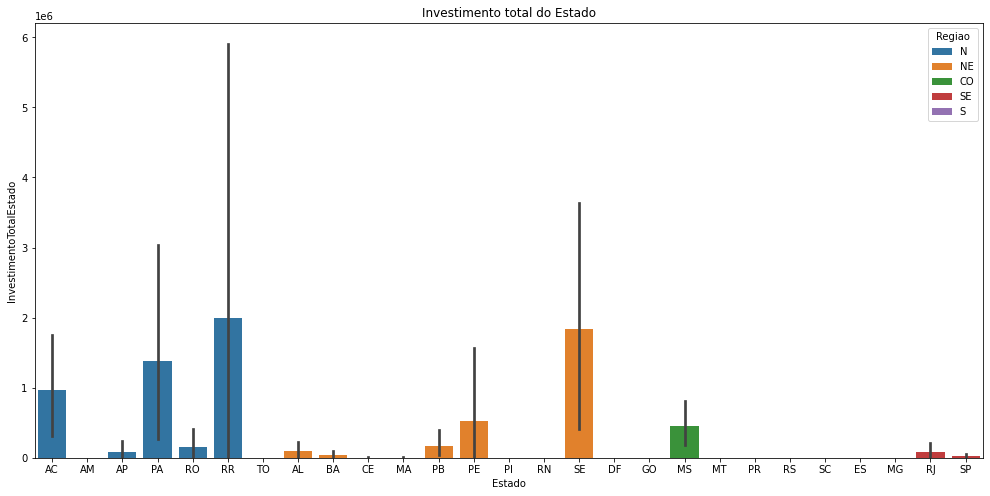

In [ ]:
investimento = dados.groupby("Estado")['InvestimentoTotalEstado'].agg([np.mean, np.std]).reset_index()
plt.figure(figsize=(17,8))
sns.barplot(x="Estado", y="InvestimentoTotalEstado", hue='Regiao', data=dados, dodge=False, order=['AC','AM','AP','PA','RO','RR', 'TO','AL','BA','CE','MA','PB','PE','PI','RN','SE','DF','GO','MS','MT','PR','RS','SC','ES','MG','RJ','SP' ])
plt.title("Investimento total do Estado")
plt.show()

**•	Interpretação dos resultados obtidos - Investimentos**

 Em 2019, a região Norte foi quem recebeu o maior valor absoluto e per capita de investimentos do Estado.

**7) RELAÇÃO ENTRE CONSUMO DE ÁGUA PERCAPITA E TAMANHO DA POPULAÇÃO**

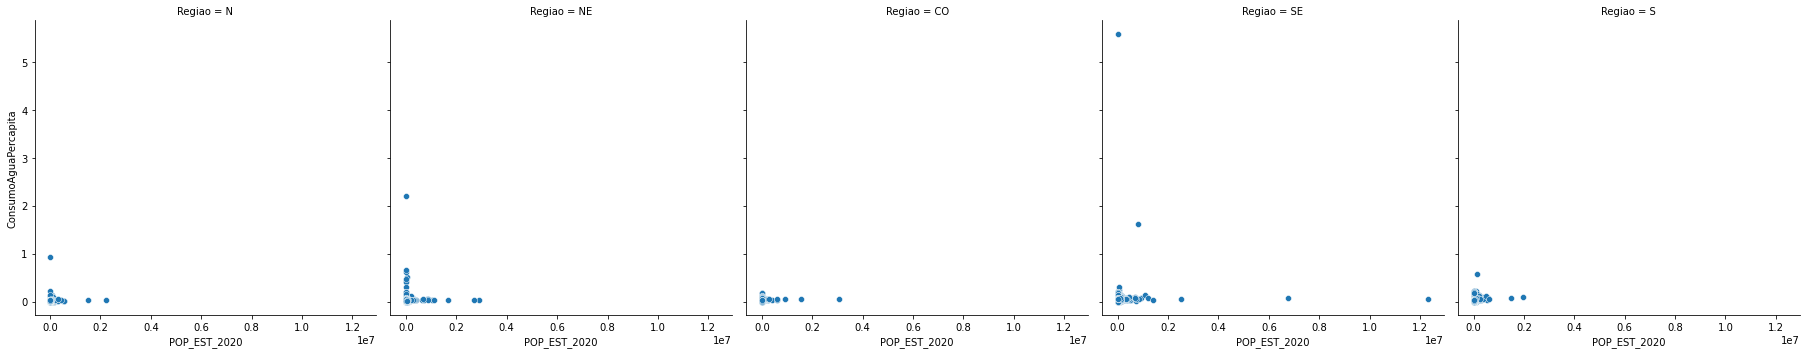

In [ ]:
# Análise da relação entre o consumo de água per capita e o tamanho da população.
sns.relplot(x="POP_EST_2020", y="ConsumoAguaPercapita", data= dados, col="Regiao")
plt.show()

**•	Interpretação dos resultados obtidos - Relação entre o consumo de água per capita e o tamanho da população**

Em nenhuma das regiões foi verificada uma correlação entre o consumo de água per capita e o tamanho da população. Foram identificados pontualmente municípios cujo consumo de água per capita é muito maior que a média. Em todos os casos são municípios pequenos.

**8) RELAÇÃO ENTRE IDH E ACESSO A ESGOTAMENTO SANITARIO**

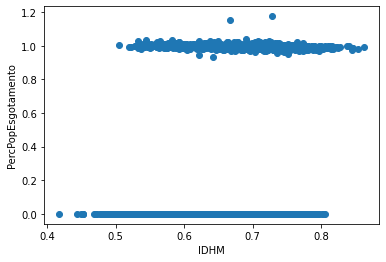

In [ ]:
# Diagrama de dispersão: verificar se há relação entre idh e Esgotamento Sanitário
fig, ax = plt.subplots()
ax.scatter(dados["IDHM"],dados["PercPopEsgotamento"])
ax.set_xlabel("IDHM")
ax.set_ylabel("PercPopEsgotamento")
plt.show()


**• Interpretação dos resultados obtidos - Relação entre IDH e acesso a esgotamento sanitário**

A princípio não se identifica relação entre as variáveis.

**TESTES DE HIPÓTESE**

In [ ]:
# cria função para realização dos testes de hipótese
def realiza_teste_quiquadrado(df, col1, col2, alpha=0.05):
  
  # obtem a tabela de contingência
  tabela_contingencia = pd.crosstab(dados[col1], dados[col2])
  
  # Realiza o teste qui-quadrado para verificar se existe relação de dependência entre os col1 and col2
  chi, p, dof, expected = stats.chi2_contingency(tabela_contingencia)

  # Verifica se o p_valor é menor que o nível de significância
  if p < alpha:
    print("As variáveis {} e {} são dependentes".format(col1, col2))
  else:
    print("As variáveis {} e {} não são dependentes".format(col1, col2))

  print()
  print("Tabela de Contingência:")
  print(tabela_contingencia)

In [ ]:
# Realiza o teste qui-quadrado para verificar se existe relação de dependência entre os IDH e acesso a esgotamento sanitário
realiza_teste_quiquadrado(dados, 'PercPopEsgotamento', 'IDHM')

As variáveis PercPopEsgotamento e IDHM não são dependentes

Tabela de Contingência:
IDHM                0.418  0.443  0.450  0.452  ...  0.845  0.847  0.854  0.862
PercPopEsgotamento                              ...                            
0.000000                1      1      1      1  ...      0      0      0      0
0.931535                0      0      0      0  ...      0      0      0      0
0.942485                0      0      0      0  ...      0      0      0      0
0.951295                0      0      0      0  ...      0      0      0      0
0.954358                0      0      0      0  ...      0      0      0      0
...                   ...    ...    ...    ...  ...    ...    ...    ...    ...
1.033977                0      0      0      0  ...      0      0      0      0
1.034051                0      0      0      0  ...      0      0      0      0
1.039755                0      0      0      0  ...      0      0      0      0
1.154578                0      0    

In [ ]:
# Realiza o teste qui-quadrado para verificar se existe relação de dependência entre os PercPopEsgotamento e InvestimentoTotalEstado
realiza_teste_quiquadrado(dados, 'PercPopEsgotamento', 'InvestimentoTotalEstado')

As variáveis PercPopEsgotamento e InvestimentoTotalEstado são dependentes

Tabela de Contingência:
InvestimentoTotalEstado  0.00         4.00         ...  49632262.76  91386958.80
PercPopEsgotamento                                 ...                          
0.000000                        1908            0  ...            0            0
0.931535                           1            0  ...            0            0
0.942485                           1            0  ...            0            0
0.951295                           0            0  ...            0            0
0.954358                           1            0  ...            0            0
...                              ...          ...  ...          ...          ...
1.029378                           1            0  ...            0            0
1.029380                           1            0  ...            0            0
1.029538                           1            0  ...            0            0
1.039755  

**• Interpretação dos resultados obtidos - Correlação entre IDH e acesso a esgotamento sanitário**

Não foi identificada correlação direta entre IDH e acesso a esgotamento sanitário. Possivelmente seria necessário verificar outros fatores que impactam no IDH para que seja avaliado o efeito apenas do acesso a esgotamento sanitário em municípios onde esses outros fatores são semelhantes.

**• Interpretação dos resultados obtidos - Correlação entre Percentual da População com acesso a Esgotamento Sanitário e acesso a Investimento Total Estado no município**

Foi identificada correlação direta entre o Percentual da população com acesso a esgotamento sanitário e o investimento total do Estado. Isso confirma o que foi visto nos gráficos, de que os estados do Norte possuem menos acesso a esgotamento sanitário e maior volume de investimento do Estado, enquanto que os estados do Sudeste possuem maior acesso a esgotamento sanitário e menor volume de investimentos do Estado.